# Random forest

In [101]:
import pandas as pd
df=pd.read_csv('diabetes.csv')
          

In [102]:
df.shape

(768, 9)

In [103]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [104]:
x=df.drop('Outcome',axis=1)
y=df['Outcome']

In [105]:
from sklearn.model_selection import train_test_split
#implementing train-test-split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.33,random_state=3)
# print(X_train)
# print(Y_train)

In [106]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)
#predictions
print(X_test)
rfc_predict=rfc.predict(X_test)
rfc_predict

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
51             1      101             50             15       36  24.2   
378            4      156             75              0        0  48.3   
27             1       97             66             15      140  23.2   
579            2      197             70             99        0  34.7   
86            13      106             72             54        0  36.6   
..           ...      ...            ...            ...      ...   ...   
558           11      103             68             40        0  46.2   
288            4       96             56             17       49  20.8   
632            2      111             60              0        0  26.2   
73             4      129             86             20      270  35.1   
723            5      117             86             30      105  39.1   

     DiabetesPedigreeFunction  Age  
51                      0.526   26  
378                     0.238   32  


C:\Users\Apssdc\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0], dtype=int64)

In [107]:
#Evaluatng Performance
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix


In [108]:
rfc_cv_score=cross_val_score(rfc,x,y,cv=10,scoring='roc_auc')

In [109]:
rfc_cv_score

array([0.77925926, 0.77740741, 0.83444444, 0.66148148, 0.79222222,
       0.77740741, 0.82555556, 0.84888889, 0.72769231, 0.80769231])

In [110]:
print("===Confussion Matrix ====")
print(confusion_matrix(Y_test,rfc_predict))
print("\n")
print("====Classification report  =====")
print(classification_report(Y_test,rfc_predict))
print("\n")
print("==== All AUC Score ===")
print(rfc_cv_score)
print("\n")
print("==== Main AUC Score====")
print("Mean AUC Score Forest :",rfc_cv_score.mean())


===Confussion Matrix ====
[[123  25]
 [ 47  59]]


====Classification report  =====
              precision    recall  f1-score   support

           0       0.72      0.83      0.77       148
           1       0.70      0.56      0.62       106

    accuracy                           0.72       254
   macro avg       0.71      0.69      0.70       254
weighted avg       0.71      0.72      0.71       254



==== All AUC Score ===
[0.77925926 0.77740741 0.83444444 0.66148148 0.79222222 0.77740741
 0.82555556 0.84888889 0.72769231 0.80769231]


==== Main AUC Score====
Mean AUC Score Forest : 0.7832051282051282


In [111]:
import numpy as np

In [112]:
#The next thing is we will tune our hyperparameters(parameter whose value is )
#improve the performance of the model
from sklearn.model_selection import RandomizedSearchCV
#number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=200,stop=2000,num=10)]
#number of features at every split
max_features=['auto','sqrt']
#max dept
max_depth=[int(x) for x in np.linspace(100,500,num=11)]
max_depth.append(None)
#create random grid
random_grid={'n_estimators':n_estimators,'max_features':max_features,'max_depth':max_depth}
#random Search of Parameter
rfc_random=RandomizedSearchCV(estimator=rfc,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,random_state=42,n_jobs=-1)
#fit the model
rfc_random.fit(X_train,Y_train)
#print Result
print(rfc_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.5min finished


{'n_estimators': 400, 'max_features': 'auto', 'max_depth': 500}


In [123]:
rfc=RandomForestClassifier(n_estimators=800,max_depth=260,max_features='sqrt')
rfc.fit(X_train,Y_train)

rfc_predict=rfc.predict(X_test)
rfc_cv_score=cross_val_score(rfc,x,y,cv=10,scoring='roc_auc')
print("===Confussion Matrix ====")
print(confusion_matrix(Y_test,rfc_predict))
print("\n")
print("====Classification report  =====")
print(classification_report(Y_test,rfc_predict))
print("\n")
print("==== All AUC Score ===")
print(rfc_cv_score)
print("\n")
print("==== Main AUC Score====")
print("Mean AUC Score Forest :",rfc_cv_score.mean())

===Confussion Matrix ====
[[ 9  0]
 [ 0 11]]


====Classification report  =====
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        11

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



==== All AUC Score ===
[1.   1.   1.   0.96 1.   1.   1.   1.   1.   1.  ]


==== Main AUC Score====
Mean AUC Score Forest : 0.9960000000000001


In [124]:
rfc.predict([[8,183,64,0,0,23.3,0.672,32]])

ValueError: Number of features of the model must match the input. Model n_features is 2 and input n_features is 8 

In [125]:
from sklearn.datasets import make_moons
# make_moons() funtion is for binary classification
#and will generate a swirl pattern ,ortwo moons


In [126]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

In [127]:
log_clf=LogisticRegression()
rnd_clf=RandomForestClassifier()


In [128]:
x,y=make_moons(n_samples=100,noise=0.15,random_state=0)
# print(x)
# print(y)


In [129]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [130]:
voting_clf=VotingClassifier(estimators=[('lr',log_clf),('rf',rnd_clf)],voting='hard')
voting_clf.fit(X_train,Y_train)

C:\Users\Apssdc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Apssdc\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gini',
                                           

In [131]:
print(log_clf,rnd_clf,voting_clf)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False) RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_inter

In [132]:
from sklearn.metrics import accuracy_score
for clf in (log_clf,rnd_clf,voting_clf):
    clf.fit(X_train,Y_train)
    y_pred=clf.predict(X_test)
    print(clf.__class__.__name__,accuracy_score(Y_test,y_pred))

LogisticRegression 0.85
RandomForestClassifier 1.0
VotingClassifier 0.95


C:\Users\Apssdc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Apssdc\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Apssdc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Bagging Classifiers

In [145]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_clf=BaggingClassifier(DecisionTreeClassifier(),n_estimators=500,max_samples=10,bootstrap=True,n_jobs=-1,oob_score=True)
bag_clf

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
    

In [154]:
bag_clf.fit(X_train,Y_train)
bag_clf.oob_score_

0.9

In [155]:
bag_clf.fit(X_train,Y_train)
y_pred=bag_clf.predict(X_test)


In [156]:
accuracy_score(Y_test,y_pred)

0.85

# Support Vector Machine

In [157]:
import matplotlib.pyplot as plt


In [158]:
dataset=pd.read_csv('cancer.csv')

In [160]:
dataset.head()

id  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302        17.99         10.38          122.80     1001.0   
1    842517        20.57         17.77          132.90     1326.0   
2  84300903        19.69         21.25          130.00     1203.0   
3  84348301        11.42         20.38           77.58      386.1   
4  84358402        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  texture_worst  perimeter_worst  area_worst  \
0         0.2419  ...          17.33           184.60      2019.0   
1         0.1812  ...          23.41           158.80      1956.0   
2         0.2069  ...          25.53           152.50      1709.0   
3         0.2597  ...          26.50            98.87       567.7   
4         0.1809  ...          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  diagnosis  
0          0.4601                  0.11890          M  
1          0.2750                  0.08902          M  
2          0.3613                  0.08758          M  
3          0.6638                  0.17300          M  
4          0.2364                  0.07678          M  

[5 rows x 32 columns]

In [161]:
x=dataset.iloc[:,1:31].values

In [182]:
y=dataset.iloc[:,31].values
print(y)

['M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B'
 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'M' 'M'
 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'M'
 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M'
 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B

In [167]:
dataset.head()

id  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302        17.99         10.38          122.80     1001.0   
1    842517        20.57         17.77          132.90     1326.0   
2  84300903        19.69         21.25          130.00     1203.0   
3  84348301        11.42         20.38           77.58      386.1   
4  84358402        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  texture_worst  perimeter_worst  area_worst  \
0         0.2419  ...          17.33           184.60      2019.0   
1         0.1812  ...          23.41           158.80      1956.0   
2         0.2069  ...          25.53           152.50      1709.0   
3         0.2597  ...          26.50            98.87       567.7   
4         0.1809  ...          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  diagnosis  
0          0.4601                  0.11890          M  
1          0.2750                  0.08902          M  
2          0.3613                  0.08758          M  
3          0.6638                  0.17300          M  
4          0.2364                  0.07678          M  

[5 rows x 32 columns]

In [168]:
print("Cancer data set dimensions : {}".format(dataset.shape))
print(dataset.groupby('diagnosis').size())

Cancer data set dimensions : (569, 32)
diagnosis
B    357
M    212
dtype: int64


In [170]:
dataset.isna().sum()

id                         0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
diagnosis                  0
dtype: int64

diagnosis
B    [[AxesSubplot(0.125,0.779333;0.103333x0.100667...
M    [[AxesSubplot(0.125,0.779333;0.103333x0.100667...
dtype: object

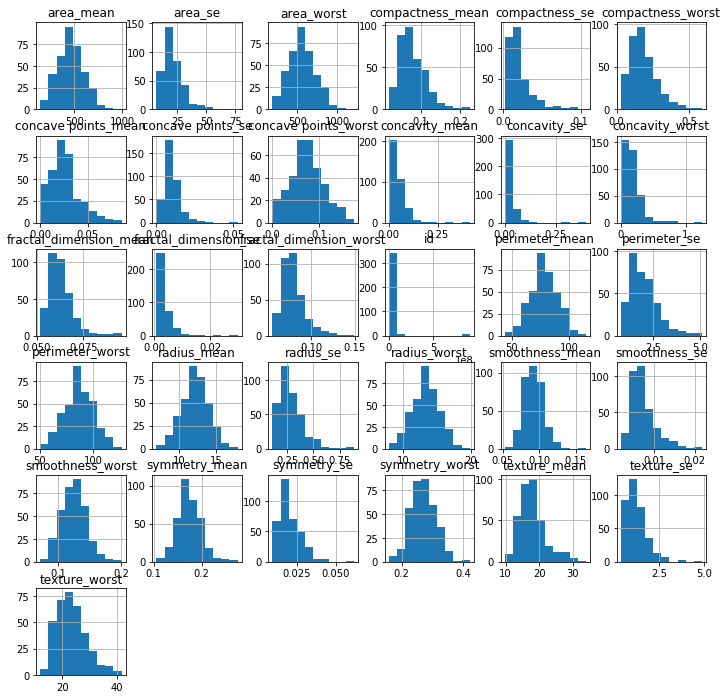

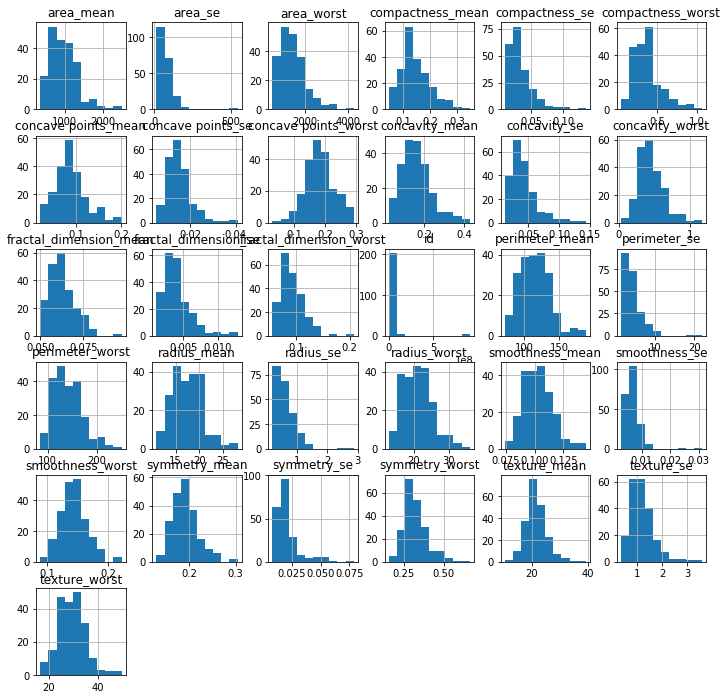

In [171]:
dataset.groupby('diagnosis').hist(figsize=(12,12))

In [181]:
#Encoding categorical data values
#Lable Encoder is the part Scikit learn library in python
#and used to convert categories data
# or ttext data into numbers whichh our predictive model can
#better Understand
from sklearn.preprocessing import LabelEncoder
lableencoder_Y=LabelEncoder()
Y=lableencoder_Y.fit_transform(y)
print(Y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

In [205]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,random_state=3)

In [206]:
#Fetures scalling
#we need to bring all features to the same level of maagnitudes
#this can be achived by scalling
#this means that you are transforming your data so that it
#fits within a specific scale
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
# print(X_train)
X_test=sc.transform(X_test)
X_test

array([[-0.99220315, -0.0424844 , -0.92647864, ..., -0.57016482,
         0.01704948, -0.50875756],
       [ 0.11785109,  0.05149349,  0.09300219, ..., -0.32127255,
        -0.71641205, -0.57513835],
       [-0.7182203 , -0.02079719, -0.72560377, ..., -0.75847539,
         0.16561844, -0.13563326],
       ...,
       [-0.25499155,  2.15274269, -0.2895583 , ..., -0.56538991,
        -0.71328428, -1.12117391],
       [-0.63913246, -0.40152813, -0.67089394, ..., -0.38901661,
         0.26883478, -0.81924837],
       [-1.53706184, -1.12684465, -1.5331861 , ..., -1.75285073,
        -0.5271821 , -0.3690367 ]])

In [207]:
from sklearn.svm import SVC
classifier=SVC(kernel='linear',random_state=0)
print(classifier.fit(X_train,Y_train))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)


In [212]:
y_pred=classifier.predict(X_test)
print(accuracy_score(Y_test,y_pred)*100)

98.24561403508771


In [209]:
cm=confusion_matrix(Y_test,y_pred)

In [210]:
cm

array([[108,   1],
       [  2,  60]], dtype=int64)

In [211]:
c=print(cm[0,0]+cm[1,1])
c

168
